# Business Problem

In [32]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [33]:
path = r"https://drive.google.com/uc?export=download&id=13ZTYmL3E8S0nz-UKl4aaTZJaI3DVBGHM"
df  = pd.read_csv(path)

In [34]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [35]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [36]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [38]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


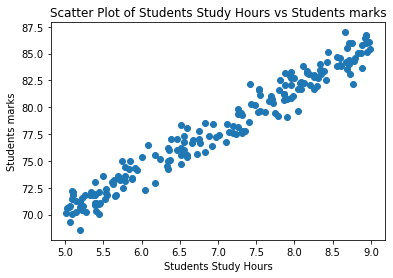

In [39]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

## Prepare the data for Machine Learning algorithms 

In [40]:
# Data Cleaning

In [41]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [42]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [43]:
df2 = df.fillna(df.mean())

In [44]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [45]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [46]:
# split dataset

In [47]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=62529)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


# Select a model and train it

In [49]:
 # y = m * x + c
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()

In [50]:
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
lr.coef_

array([[3.91836585]])

In [52]:
lr.intercept_

array([50.47866245])

In [53]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [54]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


66.15

In [55]:
y_pred  = lr.predict(X_test)
y_pred

array([[70.81498124],
       [74.69416343],
       [71.59865441],
       [79.94477368],
       [82.13905856],
       [80.72844685],
       [70.34477733],
       [77.94640709],
       [71.83375636],
       [77.89134903],
       [76.33987709],
       [77.63293782],
       [77.24110124],
       [81.00273246],
       [73.00926612],
       [70.42314465],
       [82.17824221],
       [74.92926538],
       [83.19701734],
       [73.67538831],
       [81.66885465],
       [76.18314246],
       [72.69579685],
       [81.62967099],
       [79.12191685],
       [71.99049099],
       [83.15783368],
       [85.27375124],
       [82.02150758],
       [77.43701953],
       [81.78640563],
       [83.47130295],
       [74.02804124],
       [71.40273612],
       [84.01987417],
       [72.57824587],
       [76.84926465],
       [84.1766088 ],
       [72.89171514],
       [75.36028563]])

In [56]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.190000,70.66,70.814981
1,6.180000,75.52,74.694163
2,5.390000,70.90,71.598654
3,7.520000,79.56,79.944774
4,8.080000,81.70,82.139059
5,7.720000,80.43,80.728447
6,5.070000,69.27,70.344777
7,7.010000,77.46,77.946407
8,5.450000,70.96,71.833756
9,6.995949,78.68,77.891349


## Fine-tune your model

In [57]:
lr.score(X_test,y_test)

0.9557510184085264

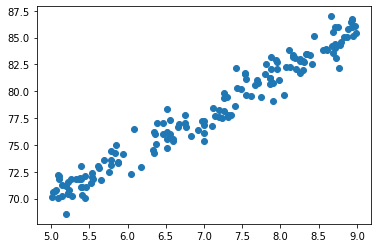

In [58]:
plt.scatter(X_train,y_train)

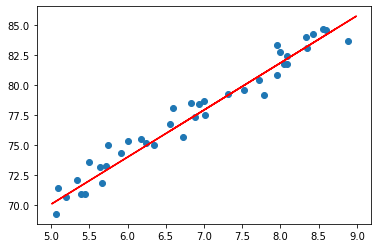

In [59]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

## Present your solution

## Save Ml Model

In [60]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [61]:
model = joblib.load("student_mark_predictor.pkl")

In [62]:
model.predict([[5]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


70.07049172499396

# Launch, monitor, and maintain your system